In [9]:
import librosa

In [10]:
import librosa.display as dsp

In [11]:
import IPython.display as ipd

In [12]:
import numpy as np

In [13]:
import matplotlib.pyplot as plt

In [16]:
audio_path = "soundData/four/5e2ac3d55807b852d9e01fd6.wav"

In [17]:
ipd.Audio(audio_path)

In [18]:
y, sr = librosa.load(audio_path)
# y - 파형의 amplitude 값
# sr - smapling rate(초당 샘플 갯수)

In [27]:
print(f"sr : {sr}, audio shape: {y.shape}\n length: {y.shape[0]/float(sr)}, secs")

sr : 22050, audio shape: (67738,)
 length: 3.0720181405895692, secs


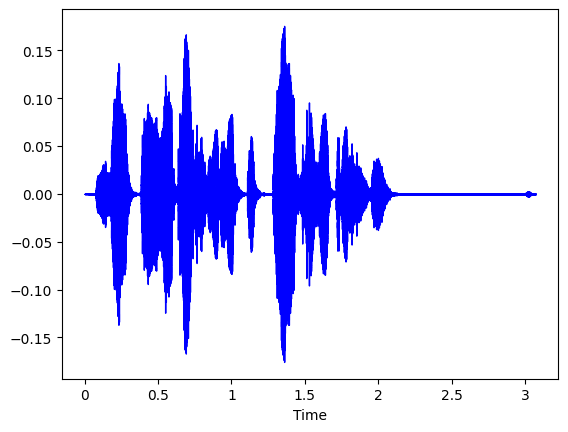

In [31]:
dsp.waveshow(y, sr=sr, color="blue")
plt.show()

In [32]:
'''
FFT(Fast Fourier Transform)고속 푸리에 변환
time-domain의 그래프를 frequency-domain으로 변환시켜주는 작업
y파형을 주파수 분석을 통해, 특정 시간에 주파수 성분이 어떻게 구성되어 있는지 확인 가능
0부터 sr까지 변환한 푸리에의 크기 만큼의 간격으로 데이터 생성
푸리에 연산시 실수부와 허수부를 반환
실수부만 보기 위해 변환값에 절대값을 씌우고 반으로 나누면 실수부만 데이터를 확인 가능
실수부와 허수부는 동일한 값을 가지고 있고 데이터 해석의 목적만 가지므로 실수부만 봄
'''
fft = np.fft.fft(y)

In [49]:
fft.shape

(67738,)

In [34]:
magnitude = np.abs(fft)
magnitude

array([0.26218861, 0.18248876, 0.13874386, ..., 0.20311708, 0.13874386,
       0.18248876])

In [36]:
# sr까지 magnitude의 개수만큼의 배열값을 생성
frequency = np.linspace(0, sr, len(magnitude))
frequency

array([0.00000000e+00, 3.25523717e-01, 6.51047433e-01, ...,
       2.20493490e+04, 2.20496745e+04, 2.20500000e+04])

In [37]:
left_spectrum = magnitude[:int(len(magnitude) / 2)]
left_spectrum

array([2.62188607e-01, 1.82488761e-01, 1.38743857e-01, ...,
       3.71356642e-06, 2.84065602e-06, 2.27733235e-06])

In [38]:
left_frequency = frequency[:int(len(frequency) / 2)]
left_frequency

array([0.00000000e+00, 3.25523717e-01, 6.51047433e-01, ...,
       1.10241862e+04, 1.10245117e+04, 1.10248372e+04])

Text(0.5, 1.0, 'Power spectrum')

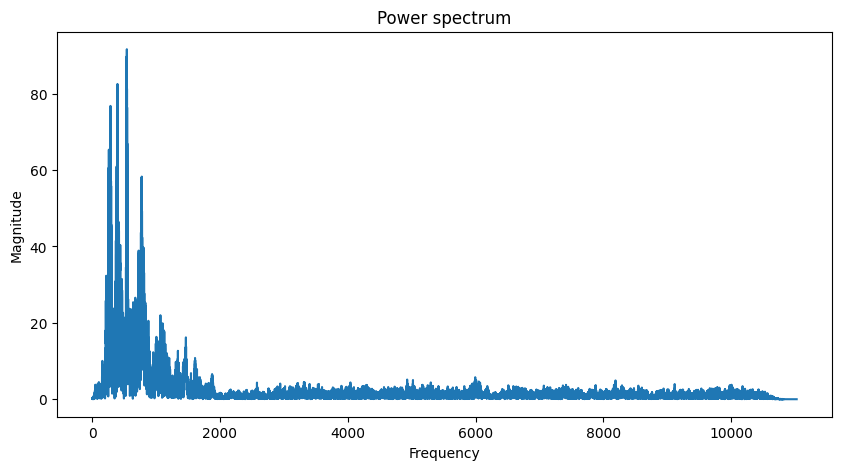

In [39]:
plt.figure(figsize = (10,5))
plt.plot(left_frequency, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")


In [50]:
'''
stft(short-time fourier transform
시간 정보가 유실되는 것을 방지하기 위해 사전에 정의한 시간의 간격(window or frame)단위로 쪼개어 푸리에 변환을 적용하는 기법
window의 크기(n_fft)와 window간에 겹치는 사이즈(hop_length)를 설정
일반적으로 n_fft의 1/4정도 겹치도록 설정
'''
n_fft = 2048 
hop_length = 512 

stft = librosa.stft(y, n_fft = n_fft, hop_length = hop_length)
spectrogram = np.abs(stft)
print("Spectogram :\n", spectrogram)

Spectogram :
 [[1.50012071e-04 3.12180819e-05 1.30120839e-03 ... 3.35113308e-03
  1.79086777e-03 1.00570754e-03]
 [2.66631541e-04 8.30755569e-04 1.64971943e-03 ... 2.70118453e-02
  2.23413836e-02 1.40643110e-02]
 [4.89168509e-04 6.36718760e-04 4.44956217e-03 ... 1.21871091e-01
  8.84910896e-02 1.43111488e-02]
 ...
 [3.09130110e-10 1.26899846e-09 2.88000113e-09 ... 1.14442935e-08
  1.20407037e-06 3.38977748e-06]
 [3.13624612e-11 8.92868446e-10 1.77204229e-09 ... 1.52150594e-08
  1.15445152e-06 3.23668974e-06]
 [5.46853743e-11 8.55208293e-10 8.15531809e-10 ... 1.03766533e-08
  1.14277373e-06 3.16082310e-06]]


In [53]:
spectrogram.shape

(1025, 133)

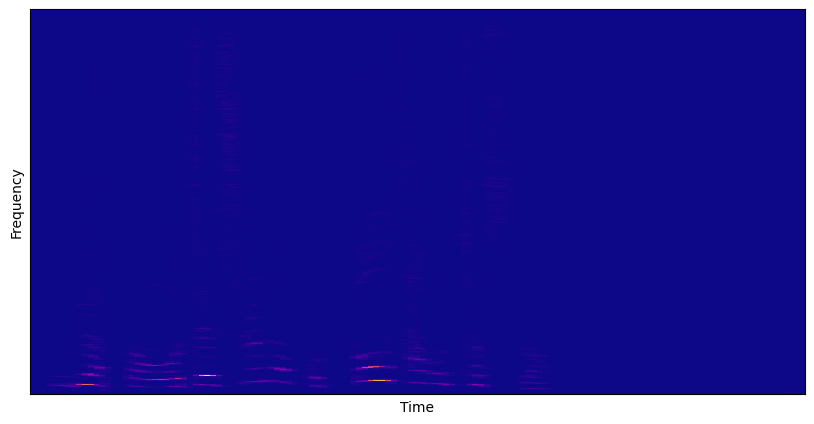

In [51]:
plt.figure(figsize = (10,5))
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.plasma()
plt.show()

Text(0.5, 1.0, 'Spectrogram (dB)')

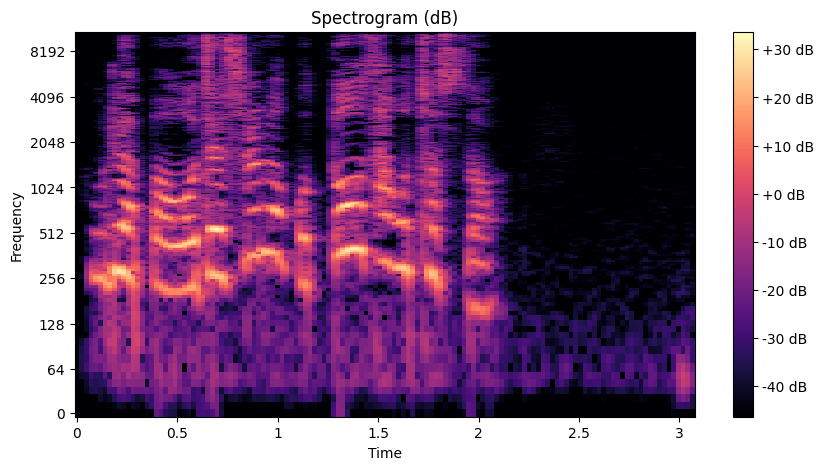

In [52]:
'''
spectrogram : 시간에 따라 변화하는 신호의 주파수 스펙트럼의 크기를 시각적으로 표현한 것
보통 푸리에변환 이후 dB(데시벨) scaling을 적용한 Log-spectogram을 구한다. 다분히 시각적인 이유뿐만 아니라, 
사람의 청각 또한 소리를 dB scale 로 인식하기 때문에, 이를 반영하여 spectogram을 나타내는 것이 분석에 용이
'''
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize = (10,5))
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

In [70]:
'''
MFCC (Mel Frequency Cepstral Coefficient)
오디오 신호 처리 분야에서 많이 사용되는 소리 데이터의 특징값(Feature)
사람의 청각이 예민하게 반응하는 정보를 강조하여 소리가 가지는 고유한 특징을 추출한 값
'''
mfcc = librosa.feature.mfcc(y=y, sr=22050, n_mfcc=40, n_fft=n_fft, hop_length=hop_length)

print("MFCC Shape: ", mfcc.shape)
print("MFCC: \n", mfcc)

MFCC Shape:  (40, 133)
MFCC: 
 [[-6.6073083e+02 -6.4789966e+02 -6.0915314e+02 ... -6.3470911e+02
  -6.3581995e+02 -6.4288763e+02]
 [ 0.0000000e+00  1.2704624e+01  5.8430847e+01 ...  3.5009239e+01
   3.3507507e+01  2.3885902e+01]
 [ 0.0000000e+00  1.5415282e+00  2.7618160e+01 ...  3.0906298e+01
   2.9586842e+01  2.1030174e+01]
 ...
 [ 0.0000000e+00 -2.9317183e+00 -3.8585820e+00 ...  1.0611246e+00
   1.2769949e+00 -6.9482213e-01]
 [ 0.0000000e+00 -3.9504027e+00 -4.2532263e+00 ...  2.7268589e-01
   1.0926023e+00 -1.1236151e+00]
 [ 0.0000000e+00 -2.9656415e+00 -2.5694931e+00 ... -2.6446179e-01
   7.8345025e-01 -5.4703343e-01]]


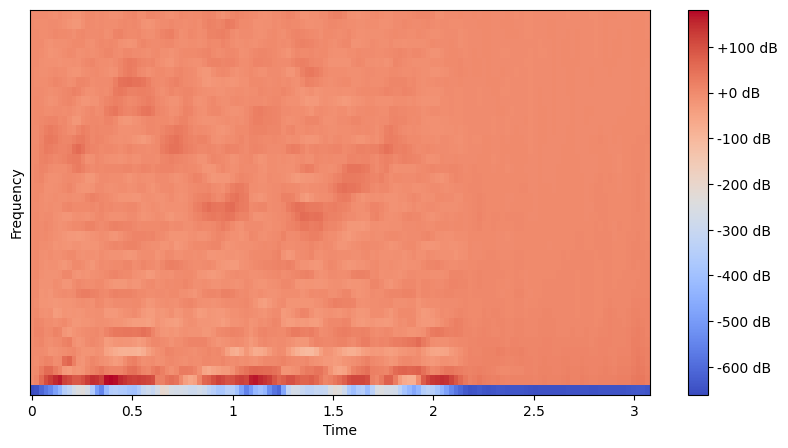

In [71]:
plt.figure(figsize = (10,5))
librosa.display.specshow(mfcc, sr=22050, hop_length=hop_length, x_axis='time')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.show()

In [72]:
max_pad_len = 174

In [73]:
pad_width = max_pad_len - mfcc.shape[1]

In [74]:
mfccs = np.pad(mfcc, pad_width=((0,0), (0, pad_width)), mode='constant')

In [75]:
mfccs.shape

(40, 174)

In [65]:
mfccs

array([[-6.6073083e+02, -6.4789966e+02, -6.0915314e+02, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  1.2704624e+01,  5.8430847e+01, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  1.5415282e+00,  2.7618160e+01, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 0.0000000e+00,  2.6990223e+00, -1.6608133e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  1.2344140e+00, -4.1000571e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  1.6859002e-01, -5.8944340e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)